# Computation of the percolation threshold in two- and three-dimensional square lattices

**Nuno de Sousa**  
**April 6th 2018**  
*version 0.1.0*


Percolation theory was developed to analyze properties of those materials whose particles connectivity determine bulk tendency. One system percolates if there is at least one path that connects its ends in a certain direction, i.e. when percolation threshold or critical probability has been reached and $p = p_C$. the probability $p$ in this context refeers to the case where the particle is present or not. Thus, a $p = 1$ generates a structure where all positions are occupied by particles.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

## two-dimensional systems

In [2]:
def simple_percolated_structure(nsize):
    A = np.random.rand(nsize,nsize)
    A[A < (1-p)] = 0
    A[A >= (1-p)] = 1
    labels = measure.label(A, neighbors=4, background=0) # uses the neighors = 4

    #plot the clusters
    fig = plt.figure(figsize = (6,6))
    plt.imshow(labels, cmap=plt.get_cmap('magma'))

    #computer the id of the cluster that percolates and plot it
    aa = np.setdiff1d(np.unique(labels[0,:]),np.array([0]))
    bb = np.setdiff1d(np.unique(labels[-1,:]),np.array([0]))

    id_percolated_clusters = list(set(aa) & set(bb))

    if id_percolated_clusters:
        print("--* The structure percolates. *--")
        labels_perc = labels
        labels_perc[labels_perc != id_percolated_clusters[0]] = 0

        fig = plt.figure(figsize = (6,6))
        plt.imshow(labels_perc)
    else:
        print("--* The structure don't percolate. *--")
        pass

    # print some results
    print('p = ', p)
    print('id of percolated clusters: {}'.format(id_percolated_clusters))
    print('number of clusters: {}'.format(labels.max()))
    hist_cluster_sizes = np.array([(x,len(labels[ np.where(labels == x)])) for x in range(labels.max())])

--* The structure percolates. *--
p =  0.65
id of percolated clusters: [1]
number of clusters: 1


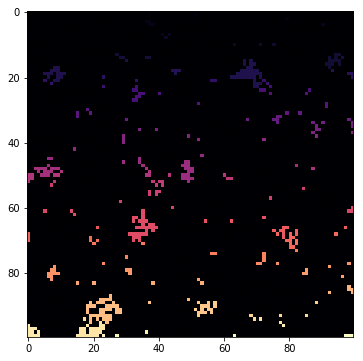

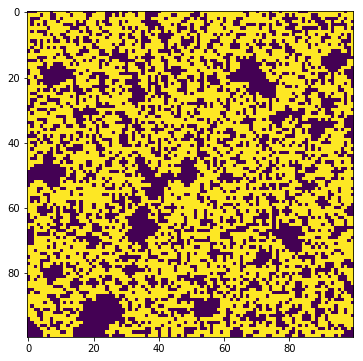

In [3]:
nsize= 100 # cluster size
p = 0.65  # percolation probability
%time simple_percolated_structure(nsize)

### Computation of the percolation threshold $p_c$

In [4]:
def percolation_threshold_computation(amt_perc, plist, N_sim, nsize, dimension = '2d'):
    for p in plist:
        n_cluster_perc = 0
        for i in range(N_sim):
            if(dimension == '2d'):
                A = np.random.rand(nsize,nsize)
            if(dimension == '3d'):
                A = np.random.rand(nsize,nsize,nsize)
            #p = 0.6  # percolation probability
            A[A < (1-p)] = 0
            A[A >= (1-p)] = 1
            labels = measure.label(A, neighbors=4, background=0) # uses the neighors = 4

            #computer the id of the cluster that percolates and plot it
            aa = np.setdiff1d(np.unique(labels[0,:]),np.array([0]))
            bb = np.setdiff1d(np.unique(labels[-1,:]),np.array([0]))

            id_percolated_clusters = list(set(aa) & set(bb))

            if id_percolated_clusters:
                labels_perc = labels
                labels_perc[labels_perc != id_percolated_clusters[0]] = 0

                n_cluster_perc = n_cluster_perc + 1
            else:
                pass

        amt_perc.append(n_cluster_perc)
    

In [5]:
N_sim = 1000
nsize= 20 # cluster size
amt_perc = []
plist = np.arange(0,1,0.01)

%time percolation_threshold_computation(amt_perc, plist, N_sim, nsize)

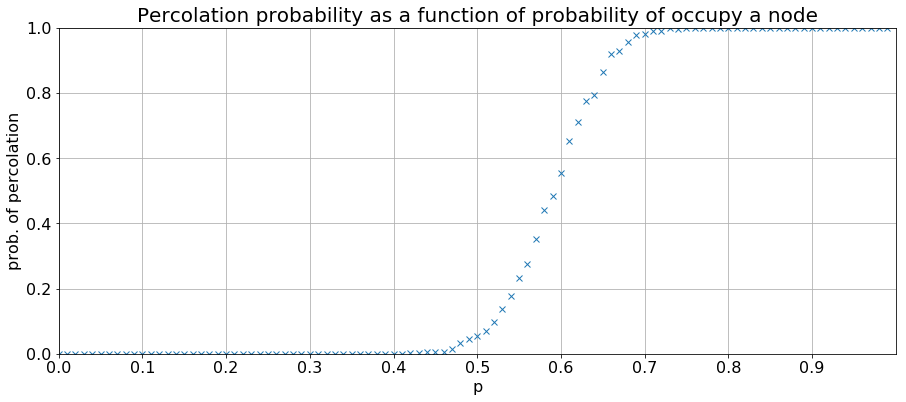

In [6]:
fig = plt.figure(figsize = (15,6))
plt.title('Percolation probability as a function of probability of occupy a node', fontsize = 20)
plt.plot( np.array(plist), np.array(amt_perc)/N_sim, 'x')
plt.xlabel('p', fontsize = 16)
plt.ylabel('prob. of percolation', fontsize = 16)
plt.xticks(np.arange(0,1,0.1), fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()

#### zoom of the critical region

In [7]:
N_sim = 1000
nsize= 20 # cluster size
amt_perc = []
plist = np.arange(0.5,0.65,0.001)

%time percolation_threshold_computation(amt_perc, plist, N_sim, nsize)

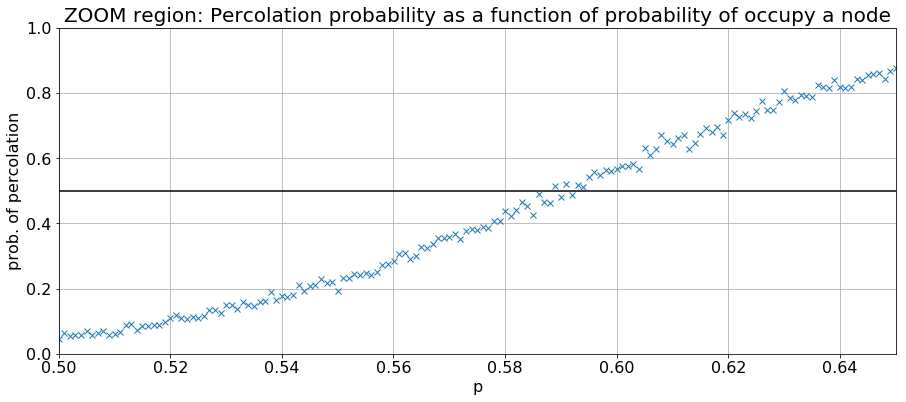

In [8]:
fig = plt.figure(figsize = (15,6))
plt.title('ZOOM region: Percolation probability as a function of probability of occupy a node', fontsize = 20)
plt.plot( np.array(plist), np.array(amt_perc)/N_sim, 'x')
plt.hlines(0.5,0,1)
plt.xlabel('p', fontsize = 16)
plt.ylabel('prob. of percolation', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim(0.5,0.65)
plt.ylim(0,1)
plt.grid()

## three-dimensional systems

In [12]:
N_sim = 1000
nsize= 15 # cluster size
amt_perc = []
plist = np.arange(0,1,0.01)

%time percolation_threshold_computation(amt_perc, plist, N_sim, nsize, dimension = '3d')

CPU times: user 25.9 s, sys: 47 ms, total: 25.9 s
Wall time: 26 s


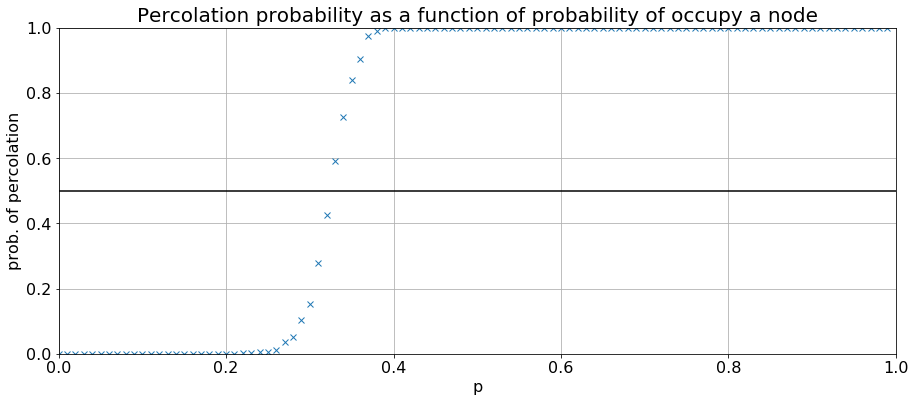

In [14]:
fig = plt.figure(figsize = (15,6))
plt.title('Percolation probability as a function of probability of occupy a node', fontsize = 20)
plt.plot( np.array(plist), np.array(amt_perc)/N_sim, 'x')
plt.hlines(0.5,0,1)
plt.xlabel('p', fontsize = 16)
plt.ylabel('prob. of percolation', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()